# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy


# locate file
output_file = "output_data/cities.csv"

# rang of latitudes and longitudes

lat_range = (-90, 90)
lon_range = (-180, 180)

## Generate Cities List

In [3]:
# list
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)        

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# store values
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : faanui
Processing Record 3 of Set 1 : ponta do sol
Processing Record 4 of Set 1 : hilo
Processing Record 5 of Set 1 : bethel
Processing Record 6 of Set 1 : busselton
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : berbera
Processing Record 9 of Set 1 : umm kaddadah
Processing Record 10 of Set 1 : longyearbyen
Processing Record 11 of Set 1 : xining
City not found. Skipping...
Processing Record 12 of Set 1 : khatanga
Processing Record 13 of Set 1 : kemijarvi
Processing Record 14 of Set 1 : mar del plata
Processing Record 15 of Set 1 : kuopio
Processing Record 16 of Set 1 : namibe
Processing Record 17 of Set 1 : mataura
Processing Record 18 of Set 1 : dumbea
Processing Record 19 of Set 1 : new norfolk
Processing Record 20 of Set 1 : georgetown
Processing Record 21 of Set 1 : mount isa
Processing Record 22 of Set 1 : butaritari
City not fo

Processing Record 33 of Set 4 : haines junction
Processing Record 34 of Set 4 : tabas
Processing Record 35 of Set 4 : amapa
Processing Record 36 of Set 4 : alofi
Processing Record 37 of Set 4 : huescar
Processing Record 38 of Set 4 : port elizabeth
Processing Record 39 of Set 4 : progreso
Processing Record 40 of Set 4 : petropavlovsk-kamchatskiy
Processing Record 41 of Set 4 : kaseda
Processing Record 42 of Set 4 : kavaratti
Processing Record 43 of Set 4 : khandyga
Processing Record 44 of Set 4 : duvan
Processing Record 45 of Set 4 : walvis bay
Processing Record 46 of Set 4 : kaeo
Processing Record 47 of Set 4 : kulhudhuffushi
Processing Record 48 of Set 4 : sistranda
Processing Record 49 of Set 4 : saskylakh
Processing Record 50 of Set 4 : cidreira
Processing Record 0 of Set 5 : placido de castro
Processing Record 1 of Set 5 : moree
Processing Record 2 of Set 5 : lompoc
Processing Record 3 of Set 5 : richards bay
Processing Record 4 of Set 5 : saldanha
Processing Record 5 of Set 5 : a

Processing Record 20 of Set 8 : churapcha
Processing Record 21 of Set 8 : mandapam
Processing Record 22 of Set 8 : staryy nadym
Processing Record 23 of Set 8 : lasa
Processing Record 24 of Set 8 : ayaviri
Processing Record 25 of Set 8 : yulara
Processing Record 26 of Set 8 : tecoanapa
Processing Record 27 of Set 8 : athabasca
Processing Record 28 of Set 8 : marystown
Processing Record 29 of Set 8 : ekhabi
Processing Record 30 of Set 8 : bonavista
Processing Record 31 of Set 8 : nishihara
Processing Record 32 of Set 8 : gigmoto
Processing Record 33 of Set 8 : seoul
Processing Record 34 of Set 8 : tamandare
Processing Record 35 of Set 8 : pleasanton
Processing Record 36 of Set 8 : ternate
Processing Record 37 of Set 8 : huarmey
Processing Record 38 of Set 8 : kuito
Processing Record 39 of Set 8 : daugavpils
Processing Record 40 of Set 8 : culaman
Processing Record 41 of Set 8 : ljungby
City not found. Skipping...
Processing Record 42 of Set 8 : pascagoula
Processing Record 43 of Set 8 : 

Processing Record 2 of Set 12 : lagunas
Processing Record 3 of Set 12 : camargo
Processing Record 4 of Set 12 : ussel
Processing Record 5 of Set 12 : kuytun
Processing Record 6 of Set 12 : trairi
Processing Record 7 of Set 12 : dudinka
Processing Record 8 of Set 12 : moerai
Processing Record 9 of Set 12 : chippewa falls
Processing Record 10 of Set 12 : samarai
Processing Record 11 of Set 12 : gizo
Processing Record 12 of Set 12 : kloulklubed
Processing Record 13 of Set 12 : sterling
Processing Record 14 of Set 12 : itaituba
Processing Record 15 of Set 12 : ahipara
Processing Record 16 of Set 12 : nanortalik
Processing Record 17 of Set 12 : saint-georges
City not found. Skipping...
Processing Record 18 of Set 12 : anadyr
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# DataFram
weather_df = pd.DataFrame({"City" : city_name_list,
                           "Lat" : lat_list, "Lng" : lng_list, "Max Temp" : max_temp_list,
                           "Humidity" : humidity_list, "Cloudiness" : cloudiness_list,
                           "Wind Speed" : wind_speed_list, "Country" : country_list,
                           "Date" : date_list})

weather_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
weather_df.head(-1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,6.06,87,75,5.66,CL,1627422196
1,Faanui,-16.4833,-151.7500,25.57,74,25,3.44,PF,1627422196
2,Ponta do Sol,32.6667,-17.1000,23.34,71,8,2.77,PT,1627422197
3,Hilo,19.7297,-155.0900,25.85,78,90,3.60,US,1627422197
4,Bethel,41.3712,-73.4140,31.64,57,20,0.45,US,1627422197
...,...,...,...,...,...,...,...,...,...
573,Sterling,39.0062,-77.4286,35.50,37,20,0.45,US,1627422097
574,Itaituba,-4.2761,-55.9836,34.09,52,20,0.00,BR,1627422337
575,Ahipara,-35.1667,173.1667,14.51,83,44,3.15,NZ,1627422338
576,Nanortalik,60.1432,-45.2371,8.14,76,55,2.02,GL,1627422338


In [8]:
# Save city data into a csv file
weather_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
test_stats = weather_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    579.000000
mean      71.089810
std       20.713039
min        6.000000
25%       59.500000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

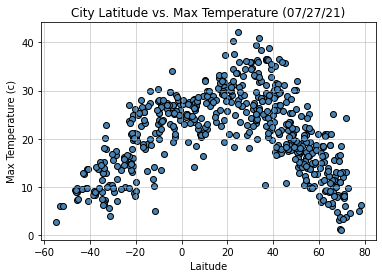

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (c)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

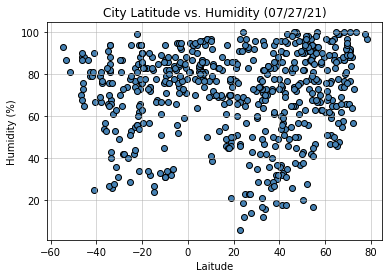

In [13]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

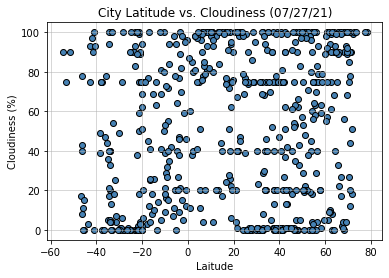

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

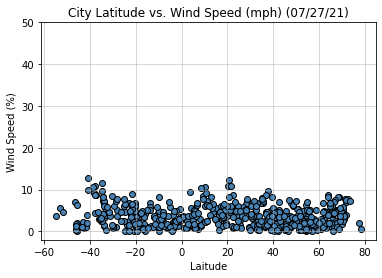

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (mph) (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.65


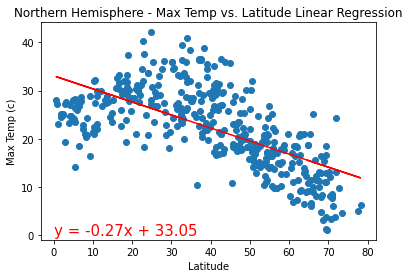

In [25]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (c)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.78


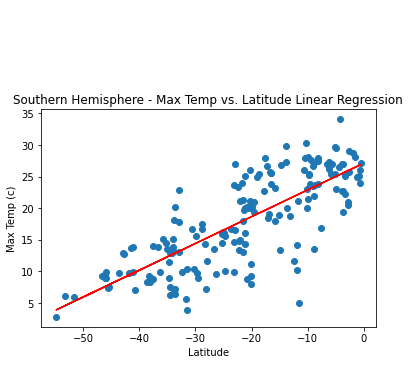

In [26]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (c)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.08


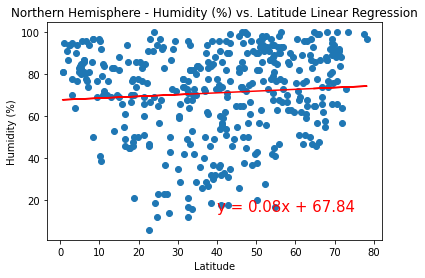

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.04


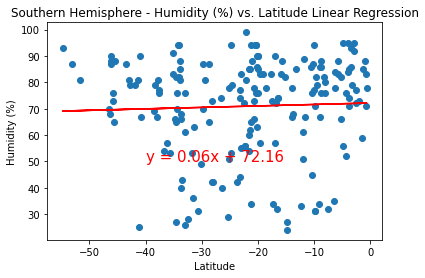

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.04


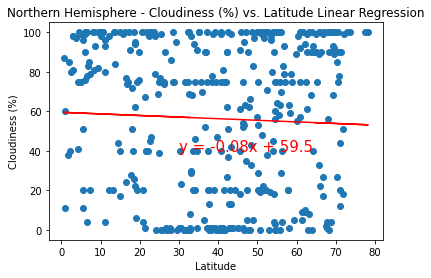

In [21]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.05


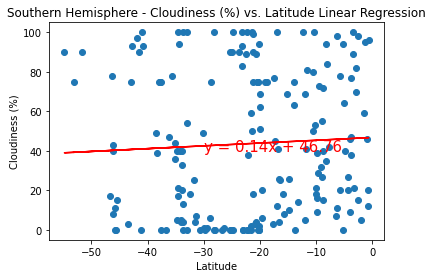

In [22]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.11


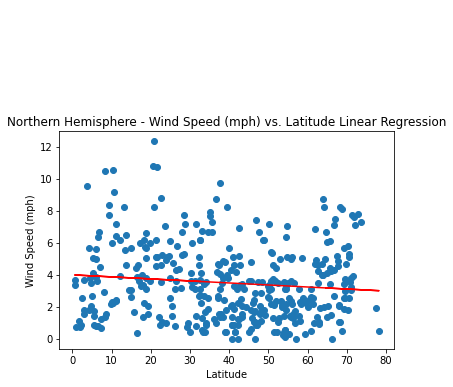

In [23]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.28


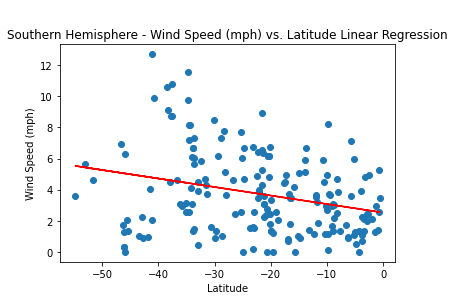

In [24]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
